<a href="https://colab.research.google.com/github/Explicit65/Titanic-Data-Set-Project/blob/main/Titanic_Data_Set_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Exploration and Cleaning**

#### Importing the Libraries and Loading the Dataset


In [9]:
pip install fastapi uvicorn

In [10]:
pip install scikit-learn==1.2.2

In [11]:
pip install catboost

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

In [13]:
titanic_dataset = pd.read_csv('/content/titanic-training-data.csv')

In [14]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_dataset.shape

(891, 12)

In [16]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic_dataset.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [18]:
len(titanic_dataset.select_dtypes(include='object').columns)

5

In [19]:
titanic_dataset.select_dtypes(include=['float64','int64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [20]:
len(titanic_dataset.select_dtypes(include=['float64','int64']).columns)

7

In [21]:
# Statistical summary
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Dealing with Missing Values, Outliers and Data Inconsistencies


In [23]:
titanic_dataset.isnull().values.any()

True

In [24]:
titanic_dataset.isnull().values.sum()

866

In [25]:
titanic_dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
# columns with null values
titanic_dataset.columns[titanic_dataset.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [27]:
len(titanic_dataset.columns[titanic_dataset.isnull().any()])

3

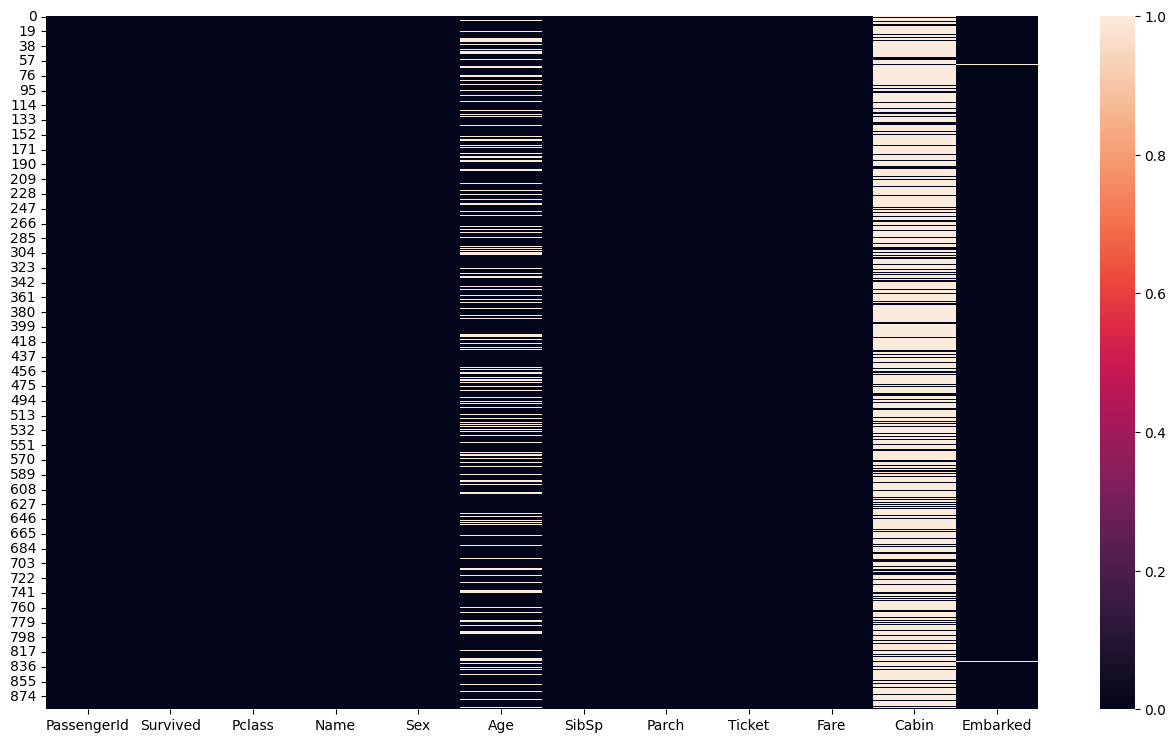

In [28]:
# null values with heatmap
plt.figure(figsize=(16,9))
sns.heatmap(titanic_dataset.isnull())
plt.show()

In [29]:
null_percent = titanic_dataset.isnull().sum() / titanic_dataset.shape[0] * 100

In [30]:
null_percent

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [31]:
# Columns to drop (more than 50% null values)
cols_to_drop = null_percent[null_percent > 50].keys()

In [32]:
cols_to_drop

Index(['Cabin'], dtype='object')

In [33]:
titanic_dataset = titanic_dataset.drop(columns=['Cabin'])

In [34]:
titanic_dataset.shape

(891, 11)

In [35]:
# Columns with null values
titanic_dataset.columns[titanic_dataset.isnull().any()]

Index(['Age', 'Embarked'], dtype='object')

In [36]:
len(titanic_dataset.columns[titanic_dataset.isnull().any()])

2

In [37]:
# Numerical Column: Age

In [38]:
titanic_dataset['Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean())

In [39]:
len(titanic_dataset.columns[titanic_dataset.isnull().any()])

1

In [40]:
# Categorical Column: Embarked

In [41]:
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0])

In [42]:
len(titanic_dataset.columns[titanic_dataset.isnull().any()])

0

In [43]:
titanic_dataset.isnull().values.any()

False

In [44]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


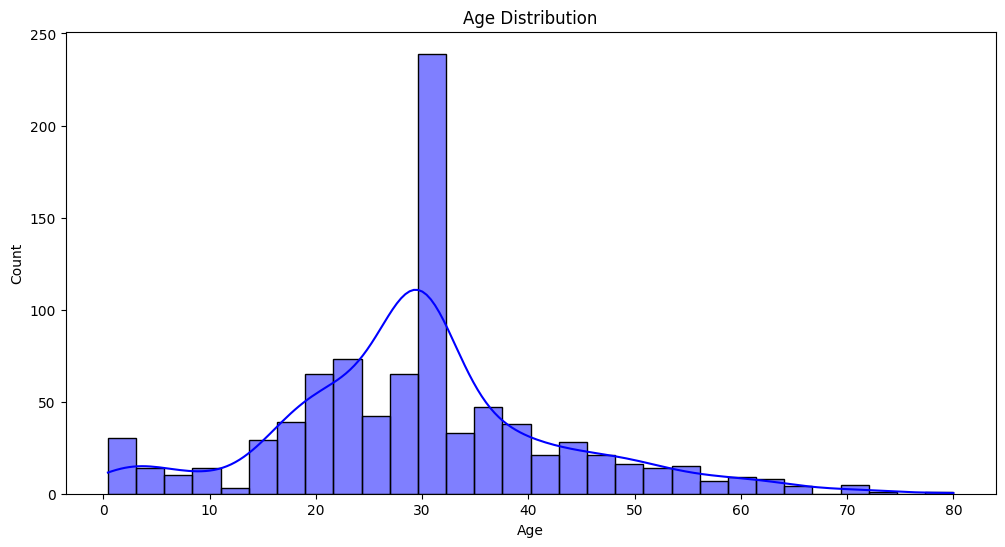

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(titanic_dataset['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.show()

<ipython-input-46-b35ff5e806ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic_dataset, palette='viridis')


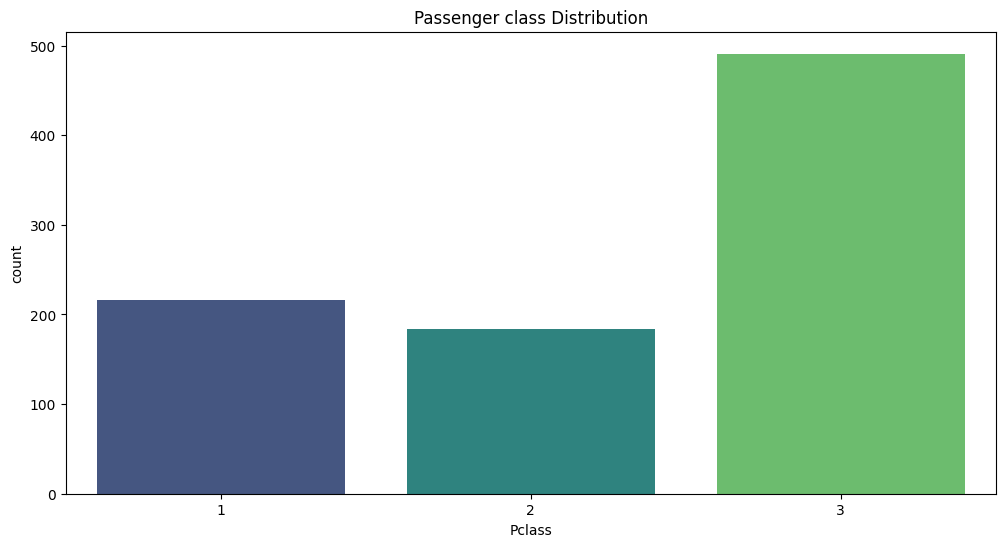

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', data=titanic_dataset, palette='viridis')
plt.title('Passenger class Distribution')
plt.show()

<ipython-input-47-d09e02fa213c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_dataset, palette='Set2')


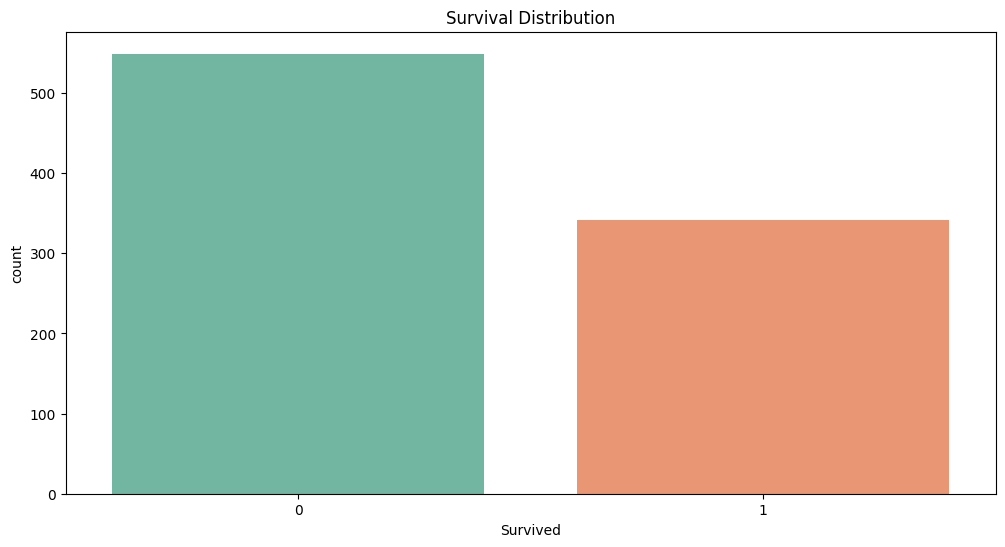

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=titanic_dataset, palette='Set2')
plt.title('Survival Distribution')
plt.show()

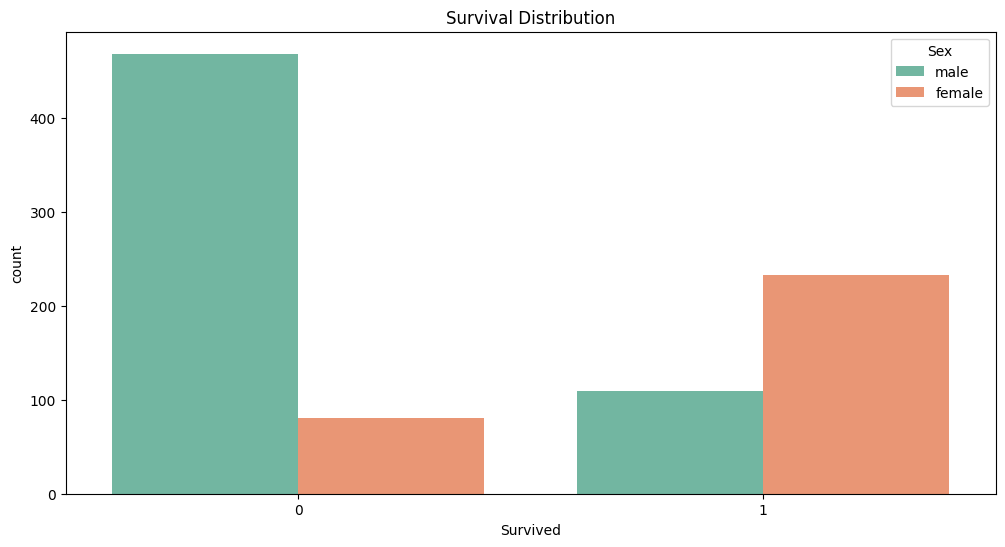

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=titanic_dataset, palette='Set2', hue='Sex')
plt.title('Survival Distribution')
plt.show()

### **Feature Engineering**

In [49]:
titanic_dataset.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [50]:
# Encoding for Sex column
gender_bool = pd.get_dummies(titanic_dataset['Sex'], drop_first=True)

In [51]:
gender = gender_bool.astype(int)

In [52]:
titanic_dataset['Gender'] = gender

In [53]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [54]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [55]:
titanic_dataset.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [56]:
titanic_dataset['Title'] = titanic_dataset['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

In [57]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [58]:
titanic_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [59]:
# Grouping uncommon titles
uncommon_titles = ['Capt', 'Col', 'the Countess', 'Don', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir']
titanic_dataset['Title'] = titanic_dataset['Title'].replace(uncommon_titles, 'Other')

In [60]:
# Replacing 'Mlle' with 'Miss', 'Ms' with 'Miss', and 'Mme' with 'Mrs'
titanic_dataset['Title'] = titanic_dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_dataset['Title'] = titanic_dataset['Title'].replace('Mme', 'Mrs')

In [61]:
# Displaying the updated DataFrame with the grouped titles
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [62]:
titanic_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Dr'], dtype=object)

In [63]:
titanic_dataset.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [64]:
# Encoding for Title column
title_bool = pd.get_dummies(titanic_dataset['Title'], prefix='Title', drop_first=True)
title = title_bool.astype(int)
title

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [65]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [66]:
titanic_dataset = pd.concat([titanic_dataset, title], axis=1)

In [67]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,0,0,1,0,0


In [68]:
# Creating Family Size column as a feature
titanic_dataset['FamilySize'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1  # I am adding one to include the passenger itself.

In [69]:
# Creating Fare per Person column as a feature
titanic_dataset['FarePerPerson'] = titanic_dataset['Fare'] / titanic_dataset['FamilySize']

In [70]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr,0,0,1,0,0,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs,0,0,0,1,0,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss,0,1,0,0,0,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs,0,0,0,1,0,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,0,0,1,0,0,1,8.05000


In [71]:
titanic_dataset['AgeCategory'] = pd.cut(titanic_dataset['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])
titanic_dataset['FareCategory'] = pd.qcut(titanic_dataset['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [72]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,FarePerPerson,AgeCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,0,0,1,0,0,2,3.62500,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,0,0,0,1,0,2,35.64165,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,0,1,0,0,0,1,7.92500,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,0,0,0,1,0,2,26.55000,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,0,0,1,0,0,1,8.05000,Adult,Medium


In [73]:
# Performing one-hot encoding on AgeCategory and FareCategory
age_fare_bool = pd.get_dummies(titanic_dataset, columns=['AgeCategory', 'FareCategory'], drop_first=True)
for col in age_fare_bool.columns:
    if age_fare_bool[col].dtype == 'bool':  # Check if the column is boolean
        age_fare_bool[col] = age_fare_bool[col].astype(int)
age_fare_bool

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Other,FamilySize,FarePerPerson,AgeCategory_Teen,AgeCategory_Adult,AgeCategory_Middle Aged,AgeCategory_Senior,FareCategory_Medium,FareCategory_High,FareCategory_Very High
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,0,2,3.62500,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,0,2,35.64165,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,1,7.92500,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,0,2,26.55000,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,0,1,8.05000,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,1,1,13.00000,0,1,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,0,1,30.00000,1,0,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,0,4,5.86250,0,1,0,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,0,1,30.00000,0,1,0,0,0,1,0


In [74]:
titanic_dataset = pd.concat([titanic_dataset, age_fare_bool], axis=1)

In [75]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender', 'Title',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'FamilySize', 'FarePerPerson', 'AgeCategory', 'FareCategory',
       'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender', 'Title',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'FamilySize', 'FarePerPerson', 'AgeCategory_Teen', 'AgeCategory_Adult',
       'AgeCategory_Middle Aged', 'AgeCategory_Senior', 'FareCategory_Medium',
       'FareCategory_High', 'FareCategory_Very High'],
      dtype='object')

In [76]:
titanic_dataset.shape

(891, 49)

In [77]:
# Removing any duplicated columns
titanic_dataset_final = titanic_dataset.loc[:, ~titanic_dataset.columns.duplicated()]

# Checking the final columns
print(titanic_dataset_final.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender', 'Title',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'FamilySize', 'FarePerPerson', 'AgeCategory', 'FareCategory',
       'AgeCategory_Teen', 'AgeCategory_Adult', 'AgeCategory_Middle Aged',
       'AgeCategory_Senior', 'FareCategory_Medium', 'FareCategory_High',
       'FareCategory_Very High'],
      dtype='object')


In [78]:
titanic_dataset_final_2 = titanic_dataset_final.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'SibSp', 'Parch', 'Title', 'AgeCategory', 'FareCategory'], axis=1)

In [79]:
# Now we have all our dataset in numerical form
titanic_dataset_final_2.head()

,PassengerId,Survived,Pclass,Age,Fare,Gender,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,FarePerPerson,AgeCategory_Teen,AgeCategory_Adult,AgeCategory_Middle Aged,AgeCategory_Senior,FareCategory_Medium,FareCategory_High,FareCategory_Very High
0,1,0,3,22.0,7.2500,1,0,0,1,0,0,2,3.62500,0,1,0,0,0,0,0
1,2,1,1,38.0,71.2833,0,0,0,0,1,0,2,35.64165,0,1,0,0,0,0,1
2,3,1,3,26.0,7.9250,0,0,1,0,0,0,1,7.92500,0,1,0,0,1,0,0
3,4,1,1,35.0,53.1000,0,0,0,0,1,0,2,26.55000,0,1,0,0,0,0,1
4,5,0,3,35.0,8.0500,1,0,0,1,0,0,1,8.05000,0,1,0,0,1,0,0


In [80]:
titanic_dataset_final_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'Gender',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'FamilySize', 'FarePerPerson', 'AgeCategory_Teen', 'AgeCategory_Adult',
       'AgeCategory_Middle Aged', 'AgeCategory_Senior', 'FareCategory_Medium',
       'FareCategory_High', 'FareCategory_Very High'],
      dtype='object')

In [81]:
titanic_dataset_final_2.shape

(891, 20)

In [82]:
titanic_dataset_final_2.count()

,0
PassengerId,891
Survived,891
Pclass,891
Age,891
Fare,891
Gender,891
Title_Master,891
Title_Miss,891
Title_Mr,891
Title_Mrs,891


In [83]:
titanic_dataset_final_2.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Age,0
Fare,0
Gender,0
Title_Master,0
Title_Miss,0
Title_Mr,0
Title_Mrs,0


In [84]:
# Handling Dependent and Independent variables
x = titanic_dataset_final_2[[
    'PassengerId', 'Pclass', 'Age', 'Fare', 'Gender', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
    'FamilySize', 'FarePerPerson', 'AgeCategory_Teen', 'AgeCategory_Adult', 'AgeCategory_Middle Aged', 'AgeCategory_Senior', 'FareCategory_Medium',
    'FareCategory_High', 'FareCategory_Very High'
    ]]
y = titanic_dataset_final_2['Survived']

In [85]:
x

,PassengerId,Pclass,Age,Fare,Gender,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,FarePerPerson,AgeCategory_Teen,AgeCategory_Adult,AgeCategory_Middle Aged,AgeCategory_Senior,FareCategory_Medium,FareCategory_High,FareCategory_Very High
0,1,3,22.000000,7.2500,1,0,0,1,0,0,2,3.62500,0,1,0,0,0,0,0
1,2,1,38.000000,71.2833,0,0,0,0,1,0,2,35.64165,0,1,0,0,0,0,1
2,3,3,26.000000,7.9250,0,0,1,0,0,0,1,7.92500,0,1,0,0,1,0,0
3,4,1,35.000000,53.1000,0,0,0,0,1,0,2,26.55000,0,1,0,0,0,0,1
4,5,3,35.000000,8.0500,1,0,0,1,0,0,1,8.05000,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,13.0000,1,0,0,0,0,1,1,13.00000,0,1,0,0,1,0,0
887,888,1,19.000000,30.0000,0,0,1,0,0,0,1,30.00000,1,0,0,0,0,1,0
888,889,3,29.699118,23.4500,0,0,1,0,0,0,4,5.86250,0,1,0,0,0,1,0
889,890,1,26.000000,30.0000,1,0,0,1,0,0,1,30.00000,0,1,0,0,0,1,0


In [86]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### **Predictive Modeling with Advanced Techniques**

In [87]:
# Train, Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [88]:
x_train.shape

(623, 19)

In [89]:
x_test.shape

(268, 19)

In [90]:
y_train.shape

(623,)

In [91]:
y_test.shape

(268,)

#### Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()

In [94]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [95]:
x_train

array([[-0.00223653, -1.63788124, -1.94694658, ..., -0.58785402,
        -0.57796809,  1.73762909],
       [ 0.78681972,  0.80326712,  0.02724309, ..., -0.58785402,
        -0.57796809, -0.57549681],
       [-1.05302852,  0.80326712, -2.17740465, ...,  1.70110258,
        -0.57796809, -0.57549681],
       ...,
       [ 1.59512125,  0.80326712,  0.8953696 , ...,  1.70110258,
        -0.57796809, -0.57549681],
       [-0.04072708, -1.63788124, -1.17875302, ..., -0.58785402,
        -0.57796809,  1.73762909],
       [-1.32246236, -1.63788124, -0.64101752, ..., -0.58785402,
        -0.57796809,  1.73762909]])

In [96]:
x_test

array([[ 1.01391396,  0.80326712,  0.02724309, ..., -0.58785402,
         1.73019934, -0.57549681],
       [-0.02533086, -0.41730706,  0.12717604, ...,  1.70110258,
        -0.57796809, -0.57549681],
       [ 1.51814016,  0.80326712, -0.71783688, ...,  1.70110258,
        -0.57796809, -0.57549681],
       ...,
       [ 0.04010307, -1.63788124,  2.73903414, ..., -0.58785402,
         1.73019934, -0.57549681],
       [ 0.20946149,  0.80326712, -0.94829495, ...,  1.70110258,
        -0.57796809, -0.57549681],
       [-0.05997235, -1.63788124, -0.10328203, ..., -0.58785402,
         1.73019934, -0.57549681]])

#### Building the model with Logistic Regression

In [97]:
# Initializing the logistic regression model with balanced class weights
classifier_lr = LogisticRegression(class_weight='balanced')

In [98]:
classifier_lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [99]:
y_predict = classifier_lr.predict(x_test)

In [100]:
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)

In [101]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [102]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.839552,0.812227,0.788136,0.837838


In [103]:
pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,132,25
Actual Yes,18,93


#### Cross Validation

In [104]:
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

In [105]:
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.10 %
Standard Deviation is 5.50 %


#### Randomized search to find the best parameters (Logistic Regression)



In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [107]:
param_distributions = {
    'logistic__C': uniform(0.001, 10),
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga'],
    'logistic__max_iter': randint(100, 500),
    'logistic__class_weight': [None, 'balanced']
}

In [108]:
logistic_model = LogisticRegression()

In [109]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', logistic_model)
])

In [110]:
random_search = RandomizedSearchCV(estimator=pipeline,
                                   param_distributions=param_distributions,
                                   n_iter=50,
                                   scoring='f1',
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)

In [111]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'logistic__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dff7cf04790>,
                                        'logistic__class_weight': [None,
                                                                   'balanced'],
                                        'logistic__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dff7cf068c0>,
                                        'logistic__penalty': ['l1', 'l2'],
                                        'logistic__solver': ['liblinear',
                                                             'saga']},
                   random_state=42, scoring='f1')

In [112]:
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=5.987584841970366, max_iter=221,
                                    penalty='l1', solver='liblinear'))])

In [113]:
calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv='prefit')
calibrated_model.fit(x_train, y_train)

CalibratedClassifierCV(cv='prefit',
                       estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('logistic',
                                                  LogisticRegression(C=5.987584841970366,
                                                                     max_iter=221,
                                                                     penalty='l1',
                                                                     solver='liblinear'))]))

In [114]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'logistic__C': 5.987584841970366, 'logistic__class_weight': None, 'logistic__max_iter': 221, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Best Score: 0.7448066349827602


#### Finetuned (Logistic Model)

In [115]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.36986947354532795, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=101,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.36986947354532795, max_iter=101, random_state=0,
                   solver='saga')

In [116]:
y_predict = classifier.predict(x_test)

In [117]:
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)

mod_results = pd.DataFrame([['Finetuned Logistic Regression', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])


results = pd.concat([results, mod_results], ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.839552,0.812227,0.788136,0.837838
1,Finetuned Logistic Regression,0.820896,0.771429,0.818182,0.729730


#### Building the model with Random Forest Classifier


In [118]:
classifier_rm = RandomForestClassifier(class_weight='balanced')
classifier_rm.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [119]:
y_predict = classifier_rm.predict(x_test)

In [120]:
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)

In [121]:
model_results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [122]:
results = pd.concat([results, model_results], ignore_index=True)

In [123]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.839552,0.812227,0.788136,0.837838
1,Finetuned Logistic Regression,0.820896,0.771429,0.818182,0.729730
2,Random forest,0.817164,0.758621,0.836957,0.693694


#### Building the model with XGBoost

In [124]:
classifier_xgb = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [125]:
y_predict_xgb = classifier_xgb.predict(x_test)

In [126]:
# Evaluating the model
acc_xgb = accuracy_score(y_test, y_predict_xgb)
f1_xgb = f1_score(y_test, y_predict_xgb)
prec_xgb = precision_score(y_test, y_predict_xgb)
rec_xgb = recall_score(y_test, y_predict_xgb)

In [127]:
model_results_xgb = pd.DataFrame([['XGBoost', acc_xgb, f1_xgb, prec_xgb, rec_xgb]],
                                 columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [128]:
results = pd.concat([results, model_results_xgb], ignore_index=True)

In [129]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.839552,0.812227,0.788136,0.837838
1,Finetuned Logistic Regression,0.820896,0.771429,0.818182,0.729730
2,Random forest,0.817164,0.758621,0.836957,0.693694
3,XGBoost,0.809701,0.760563,0.794118,0.729730


#### Building the model with CatBoost

In [130]:
classifier_cb = CatBoostClassifier(auto_class_weights='Balanced', verbose=0)
classifier_cb.fit(x_train, y_train)

In [131]:
y_predict_cb = classifier_cb.predict(x_test)

In [132]:
# Evaluating the model
acc_cb = accuracy_score(y_test, y_predict_cb)
f1_cb = f1_score(y_test, y_predict_cb)
prec_cb = precision_score(y_test, y_predict_cb)
rec_cb = recall_score(y_test, y_predict_cb)

In [133]:
model_results_cb = pd.DataFrame([['CatBoost', acc_cb, f1_cb, prec_cb, rec_cb]],
                                columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [134]:
results = pd.concat([results, model_results_cb], ignore_index=True)

In [135]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.839552,0.812227,0.788136,0.837838
1,Finetuned Logistic Regression,0.820896,0.771429,0.818182,0.729730
2,Random forest,0.817164,0.758621,0.836957,0.693694
3,XGBoost,0.809701,0.760563,0.794118,0.729730
4,CatBoost,0.832090,0.788732,0.823529,0.756757


After evaluating the performance of the Logistic Regression model both with and without fine-tuning, I’ve decided to stick with the original model, without fine-tuning. Here’s why:



**Logistic Regression Model without Fine-Tuning:**
Accuracy: 83.95%
F1-Score: 81.27%
Precision: 78.81%
Recall: 83.78%
**Logistic Regression Model with Fine-Tuning:**
Accuracy: 82.09%
F1-Score: 77.14%
Precision: 81.81%
Recall: 72.97%
The model without fine-tuning delivers better overall performance, with a higher accuracy, F1-Score and Recall. This means it’s more reliable at making correct predictions across the board, striking a good balance between precision and recall.



While the fine-tuned model does offer higher precision (meaning it’s better at avoiding false positives), it comes at the cost of lower recall and overall accuracy. Since I want the model to perform well in a balanced way, catching as many true positives as possible while maintaining solid accuracy, I’m opting for the version without fine-tuning. It’s the best fit for the task at hand.

In [136]:
# Saving the model as a pickle file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(classifier_lr, file)

In [137]:
# Saving the scaler
with open('sc.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [138]:
titanic_test_dataset = pd.read_csv('/content/test.csv')

In [139]:
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [140]:
titanic_test_dataset.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [141]:
titanic_test_dataset.shape

(418, 11)

In [142]:
titanic_test_dataset.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [143]:
titanic_test_dataset.select_dtypes(include=['float64','int64']).columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [144]:
titanic_test_dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [145]:
titanic_test_dataset.isnull().values.any()

True

In [146]:
titanic_test_dataset.isnull().values.sum()

414

In [147]:
titanic_test_dataset.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [148]:
# columns with null values
titanic_test_dataset.columns[titanic_test_dataset.isnull().any()]

Index(['Age', 'Fare', 'Cabin'], dtype='object')

In [149]:
len(titanic_test_dataset.columns[titanic_test_dataset.isnull().any()])

3

In [150]:
null_test_percent = titanic_test_dataset.isnull().sum() / titanic_test_dataset.shape[0] * 100

In [151]:
null_test_percent

,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234
Cabin,78.229665


In [152]:
# Columns to drop (more than 50% null values)
test_cols_to_drop = null_percent[null_percent > 50].keys()

In [153]:
test_cols_to_drop

Index(['Cabin'], dtype='object')

In [154]:
titanic_test_dataset = titanic_test_dataset.drop(columns=['Cabin'])

In [155]:
titanic_test_dataset.shape

(418, 10)

In [156]:
# Columns with null values
titanic_test_dataset.columns[titanic_test_dataset.isnull().any()]

Index(['Age', 'Fare'], dtype='object')

In [157]:
titanic_test_dataset['Age'] = titanic_test_dataset['Age'].fillna(titanic_test_dataset['Age'].mean())

In [158]:
titanic_test_dataset['Fare'] = titanic_test_dataset['Fare'].fillna(titanic_test_dataset['Fare'].mean())

In [159]:
titanic_test_dataset.isnull().values.any()

False

In [160]:
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [161]:
gender_bool = pd.get_dummies(titanic_test_dataset['Sex'], drop_first=True)
gender = gender_bool.astype(int)
titanic_test_dataset['Gender'] = gender

In [162]:
titanic_test_dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [163]:
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [164]:
titanic_test_dataset['Title'] = titanic_test_dataset['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

In [165]:
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,Mrs


In [166]:
titanic_test_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [167]:
# Grouping uncommon titles
uncommon_titles = ['Col', 'Dona', 'Rev']
titanic_test_dataset['Title'] = titanic_test_dataset['Title'].replace(uncommon_titles, 'Other')

In [168]:
# Replacing 'Ms' with 'Miss'
titanic_test_dataset['Title'] = titanic_test_dataset['Title'].replace('Ms', 'Miss')

In [169]:
# Displaying the updated DataFrame with the grouped titles
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,Mrs


In [170]:
titanic_test_dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Dr'], dtype=object)

In [171]:
titanic_test_dataset.count()

,0
PassengerId,418
Pclass,418
Name,418
Sex,418
Age,418
SibSp,418
Parch,418
Ticket,418
Fare,418
Embarked,418


In [172]:
# Encoding for Title column
test_title_bool = pd.get_dummies(titanic_test_dataset['Title'], prefix='Title', drop_first=True)
test_title = test_title_bool.astype(int)
test_title

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
413,0,0,1,0,0
414,0,0,0,0,1
415,0,0,1,0,0
416,0,0,1,0,0


In [173]:
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,Mrs


In [174]:
titanic_test_dataset = pd.concat([titanic_test_dataset, test_title], axis=1)

In [175]:
# Creating Family Size column as a feature
titanic_test_dataset['FamilySize'] = titanic_test_dataset['SibSp'] + titanic_test_dataset['Parch'] + 1

In [176]:
# Creating Fare per Person column as a feature
titanic_test_dataset['FarePerPerson'] = titanic_test_dataset['Fare'] / titanic_test_dataset['FamilySize']

In [177]:
titanic_test_dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Gender', 'Title', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'FamilySize',
       'FarePerPerson'],
      dtype='object')

In [178]:
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,FarePerPerson
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,Mr,0,0,1,0,0,1,7.829200
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,Mrs,0,0,0,1,0,2,3.500000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,Mr,0,0,1,0,0,1,9.687500
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Mr,0,0,1,0,0,1,8.662500
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,Mrs,0,0,0,1,0,3,4.095833


In [179]:
titanic_test_dataset['AgeCategory'] = pd.cut(titanic_test_dataset['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])
titanic_test_dataset['FareCategory'] = pd.qcut(titanic_test_dataset['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [180]:
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,FarePerPerson,AgeCategory,FareCategory
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,...,Mr,0,0,1,0,0,1,7.829200,Adult,Low
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,...,Mrs,0,0,0,1,0,2,3.500000,Middle Aged,Low
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,...,Mr,0,0,1,0,0,1,9.687500,Senior,Medium
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,...,Mr,0,0,1,0,0,1,8.662500,Adult,Medium
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,...,Mrs,0,0,0,1,0,3,4.095833,Adult,Medium


In [181]:
# Performing one-hot encoding on AgeCategory and FareCategory
age_fare_bool_test = pd.get_dummies(titanic_test_dataset, columns=['AgeCategory', 'FareCategory'], drop_first=True)
for col in age_fare_bool_test.columns:
   if age_fare_bool_test[col].dtype == 'bool':  # Check if the column is boolean
       age_fare_bool_test[col] = age_fare_bool_test[col].astype(int)
age_fare_bool_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Title_Other,FamilySize,FarePerPerson,AgeCategory_Teen,AgeCategory_Adult,AgeCategory_Middle Aged,AgeCategory_Senior,FareCategory_Medium,FareCategory_High,FareCategory_Very High
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,...,0,1,7.829200,0,1,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,...,0,2,3.500000,0,0,1,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,...,0,1,9.687500,0,0,0,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,...,0,1,8.662500,0,1,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,...,0,3,4.095833,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,...,0,1,8.050000,0,1,0,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,...,1,1,108.900000,0,1,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,...,0,1,7.250000,0,1,0,0,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,...,0,1,8.050000,0,1,0,0,1,0,0


In [182]:
titanic_test_dataset = pd.concat([titanic_test_dataset, age_fare_bool_test], axis=1)

In [183]:
titanic_test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Title_Other,FamilySize,FarePerPerson,AgeCategory_Teen,AgeCategory_Adult,AgeCategory_Middle Aged,AgeCategory_Senior,FareCategory_Medium,FareCategory_High,FareCategory_Very High
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,...,0,1,7.829200,0,1,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,...,0,2,3.500000,0,0,1,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,...,0,1,9.687500,0,0,0,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,...,0,1,8.662500,0,1,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,...,0,3,4.095833,0,1,0,0,1,0,0


In [184]:
titanic_test_dataset.shape

(418, 47)

In [185]:
# Removing any duplicated columns
titanic_test_dataset_final = titanic_test_dataset.loc[:, ~titanic_test_dataset.columns.duplicated()]

# Checking the final columns
print(titanic_test_dataset_final.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Gender', 'Title', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'FamilySize',
       'FarePerPerson', 'AgeCategory', 'FareCategory', 'AgeCategory_Teen',
       'AgeCategory_Adult', 'AgeCategory_Middle Aged', 'AgeCategory_Senior',
       'FareCategory_Medium', 'FareCategory_High', 'FareCategory_Very High'],
      dtype='object')


In [186]:
titanic_test_dataset_final_2 = titanic_test_dataset_final.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'SibSp', 'Parch', 'Title', 'AgeCategory', 'FareCategory'], axis=1)

In [187]:
# Now we have all our dataset in numerical form
titanic_test_dataset_final_2.head()

,PassengerId,Pclass,Age,Fare,Gender,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,FarePerPerson,AgeCategory_Teen,AgeCategory_Adult,AgeCategory_Middle Aged,AgeCategory_Senior,FareCategory_Medium,FareCategory_High,FareCategory_Very High
0,892,3,34.5,7.8292,1,0,0,1,0,0,1,7.829200,0,1,0,0,0,0,0
1,893,3,47.0,7.0000,0,0,0,0,1,0,2,3.500000,0,0,1,0,0,0,0
2,894,2,62.0,9.6875,1,0,0,1,0,0,1,9.687500,0,0,0,1,1,0,0
3,895,3,27.0,8.6625,1,0,0,1,0,0,1,8.662500,0,1,0,0,1,0,0
4,896,3,22.0,12.2875,0,0,0,0,1,0,3,4.095833,0,1,0,0,1,0,0


In [188]:
titanic_test_dataset_final_2.shape

(418, 19)

In [189]:
titanic_test_dataset_final_2.count()

,0
PassengerId,418
Pclass,418
Age,418
Fare,418
Gender,418
Title_Master,418
Title_Miss,418
Title_Mr,418
Title_Mrs,418
Title_Other,418


In [190]:
titanic_test_dataset_final_2.isnull().sum()

,0
PassengerId,0
Pclass,0
Age,0
Fare,0
Gender,0
Title_Master,0
Title_Miss,0
Title_Mr,0
Title_Mrs,0
Title_Other,0


In [191]:
titanic_test_dataset_final_2.dtypes

,0
PassengerId,int64
Pclass,int64
Age,float64
Fare,float64
Gender,int64
Title_Master,int64
Title_Miss,int64
Title_Mr,int64
Title_Mrs,int64
Title_Other,int64


In [192]:
file_path = '/content/updated_test.csv'
titanic_test_dataset_final_2.to_csv(file_path, index=False)

In [193]:
!pip install fastapi uvicorn nest-asyncio pyngrok

In [194]:
!pip install fastapi uvicorn
from fastapi import FastAPI

In [195]:
import uvicorn
from fastapi import FastAPI
from pyngrok import ngrok

In [196]:
!pip install pyngrok

In [197]:
from pyngrok import ngrok

In [198]:
!pip install uvicorn catboost groq python-dotenv fastapi nest_asyncio pyngrok

import uvicorn
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import pickle
import pandas as pd
from fastapi.responses import RedirectResponse
import nest_asyncio
from pyngrok import ngrok

# Applying nest_asyncio to allow uvicorn to run in Jupyter/Colab
nest_asyncio.apply()

# Setting up Ngrok and create a tunnel
ngrok.set_auth_token("2lBwnSyP46c9fkyGcNb17j5KSum_3aYqWqgNdoPZhWVGKHRfn")  # Replace with your actual auth token
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Initializing FastAPI
app = FastAPI()

# Defining the base route
@app.get("/")
def read_root():
    return {"message": "Welcome to the Titanic prediction API!"}

@app.get("/favicon.ico")
async def favicon():
    return RedirectResponse(url="https://example.com/favicon.ico")

# Loading the pre-trained preprocessor and model
try:
    with open('sc.pkl', 'rb') as file:
        sc = pickle.load(file)  # Loading the scaler

    with open('lr_model.pkl', 'rb') as file:
        model = pickle.load(file)  # Loading the model
except Exception as e:
    raise RuntimeError("Failed to load scaler or model") from e

# Defining the request body schema
class TitanicData(BaseModel):
    PassengerId: int = None
    Pclass: int = None
    Age: float = None
    Fare: float = None
    Gender: int = None
    Title_Master: int = None
    Title_Miss: int = None
    Title_Mr: int = None
    Title_Mrs: int = None
    Title_Other: int = None
    FamilySize: int = None
    FarePerPerson: float = None
    AgeCategory_Teen: int = None
    AgeCategory_Adult: int = None
    AgeCategory_Middle_Aged: int = None
    AgeCategory_Senior: int = None
    FareCategory_Medium: int = None
    FareCategory_High: int = None
    FareCategory_Very_High: int = None

def extract_and_prepare_features(row):
    features = {
        'PassengerId': row.get('PassengerId', None),
        'Pclass': row.get('Pclass', None),
        'Age': row.get('Age', None),
        'Fare': row.get('Fare', None),
        'Gender': row.get('Gender', None),
        'Title_Master': row.get('Title_Master', None),
        'Title_Miss': row.get('Title_Miss', None),
        'Title_Mr': row.get('Title_Mr', None),
        'Title_Mrs': row.get('Title_Mrs', None),
        'Title_Other': row.get('Title_Other', None),
        'FamilySize': row.get('FamilySize', None),
        'FarePerPerson': row.get('FarePerPerson', None),
        'AgeCategory_Teen': row.get('AgeCategory_Teen', None),
        'AgeCategory_Adult': row.get('AgeCategory_Adult', None),
        'AgeCategory_Middle Aged': row.get('AgeCategory_Middle_Aged', None),
        'AgeCategory_Senior': row.get('AgeCategory_Senior', None),
        'FareCategory_Medium': row.get('FareCategory_Medium', None),
        'FareCategory_High': row.get('FareCategory_High', None),
        'FareCategory_Very High': row.get('FareCategory_Very_High', None),
    }

    # Converting to DataFrame for processing
    features_df = pd.DataFrame([features])

    # Check for missing values and fill if necessary
    features_df = features_df.fillna(0)

    # Applying the scaler to the features
    processed_features = sc.transform(features_df)

    return processed_features

@app.post("/predict")
def predict(data: TitanicData):
    try:
        # Extract and prepare features
        prepared_features = extract_and_prepare_features(data.dict())

        # Making prediction using the model
        prediction = model.predict(prepared_features)

        return {"prediction": int(prediction[0])}
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Prediction error: {str(e)}")

def predict_on_test_data(test_data):
    predictions = []

    for _, row in test_data.iterrows():
        try:
            prepared_features = extract_and_prepare_features(row)

            prediction = model.predict(prepared_features)

            predictions.append(prediction[0])
        except Exception as e:
            print(f"Prediction error for row {row}: {str(e)}")
            predictions.append(None)


    test_data['Survived'] = predictions

    # Saving the updated DataFrame to a new CSV file
    try:
        output_path = '/content/test_with_predictions.csv'
        test_data.to_csv(output_path, index=False)
        print(f"Predictions saved to {output_path}")
    except Exception as e:
        raise RuntimeError("Failed to save predictions to CSV") from e

    return test_data

if __name__ == "__main__":
    file_path = '/content/updated_test.csv'
    test_data = pd.read_csv(file_path)

    test_data_with_predictions = predict_on_test_data(test_data)

    # Starting the FastAPI server
    uvicorn.run(app, host="127.0.0.1", port=8000)


Public URL: NgrokTunnel: "https://4d18-35-236-162-16.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [90244]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Predictions saved to /content/test_with_predictions.csv


INFO:     Shutting down
INFO:     Finished server process [90244]


In [199]:
titanic_dataset_with_predictions = pd.read_csv('/content/test_with_predictions.csv')

In [200]:
titanic_dataset_with_predictions.head()

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /usr/local/lib/python3.10/dist-packages/uvicorn/server.py:67> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 577, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/lib/python3.10/asyncio/tasks.py", l

,PassengerId,Pclass,Age,Fare,Gender,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,FarePerPerson,AgeCategory_Teen,AgeCategory_Adult,AgeCategory_Middle Aged,AgeCategory_Senior,FareCategory_Medium,FareCategory_High,FareCategory_Very High,Survived
0,892,3,34.5,7.8292,1,0,0,1,0,0,1,7.829200,0,1,0,0,0,0,0,0
1,893,3,47.0,7.0000,0,0,0,0,1,0,2,3.500000,0,0,1,0,0,0,0,1
2,894,2,62.0,9.6875,1,0,0,1,0,0,1,9.687500,0,0,0,1,1,0,0,0
3,895,3,27.0,8.6625,1,0,0,1,0,0,1,8.662500,0,1,0,0,1,0,0,0
4,896,3,22.0,12.2875,0,0,0,0,1,0,3,4.095833,0,1,0,0,1,0,0,1


In [201]:
titanic_dataset_submission = titanic_dataset_with_predictions.drop(['Pclass', 'Age', 'Fare', 'Gender', 'Title_Master', 'Title_Miss', 'Title_Mr',
                                       'Title_Mrs', 'Title_Other', 'FamilySize', 'FarePerPerson', 'AgeCategory_Teen',
                                       'AgeCategory_Adult', 'AgeCategory_Middle Aged', 'AgeCategory_Senior', 'FareCategory_Medium',
                                       'FareCategory_High', 'FareCategory_Very High'], axis=1)

In [202]:
titanic_dataset_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
